## Applying Classification on  Churn_Modelling Dataset 
Churn Rate is the percentage of subscribers to a service who discontinue their subscriptions 
to the service within a given time period. For a company to expand its clientele, its growth rate, 
as measured by the number of new customers, must exceed its churn rate.

About the Dataset: 
    This is a Classification Problem in which 
    you'll classify a customer based on his/her 
    Credit Score, Region, Gender, Age, Tenure, Balance, Salary etc.
    whether he/she will EXIT(1) or NOT(0). The dataset is well-labeled to explain all its columns. 
    Feel free to explore the dataset. The Target Variable is EXITED(0/1) which you have to classify.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Provided Dataset conversion from excel file to dataframe for classification modeling.
df = pd.read_csv('Churn_Modelling.csv',sep=',')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [2]:
#Plotting a correlation graph to view how each attribute scales to correlating to one another. 

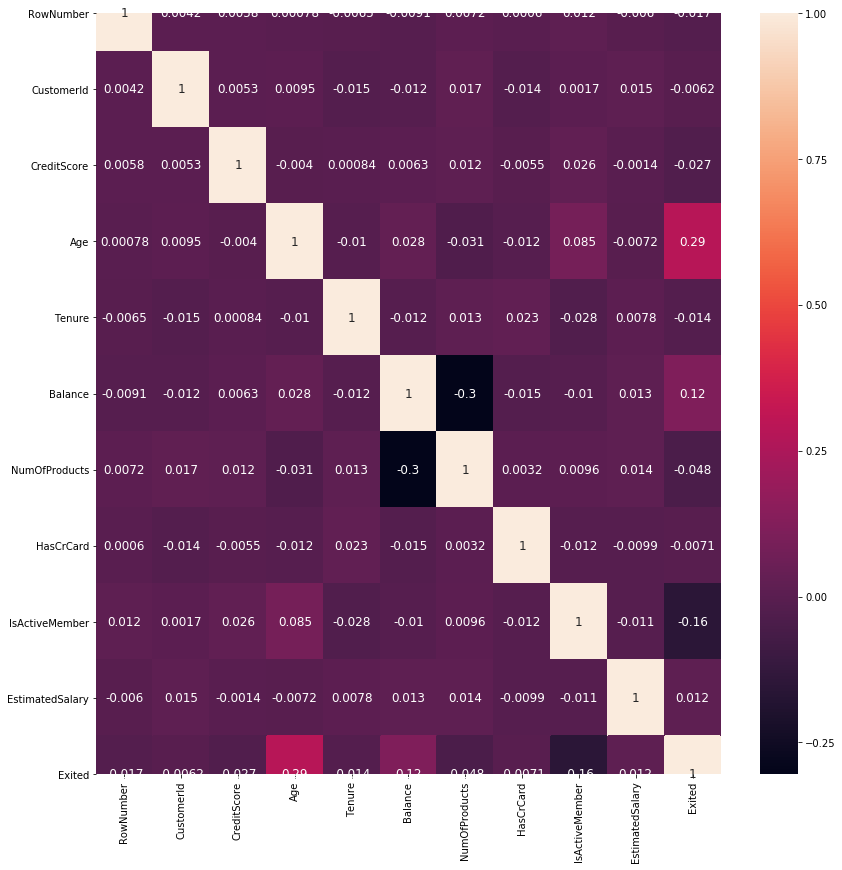

In [3]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(14,14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### Preparing the dataset for modeling. 

In [4]:
# Eliminating Unessary columns that will be less likely to effect or predictions. A few Categorical values that do not correlate 
# with our churn. The following columns RowNumber, CustomerID and Surname can be dropped from dataset.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.shape

(10000, 11)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Modeling requires we input numerical data therfore we must convert our remaining
categorical values into numerical values using encoding. 

Encoding data before splitting data for the attributes country and gender.
0, 1, 2 for france,spain, germany Gender will be 0 and 1.

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Convert Geopgraphy values into 0, 1, 2 France = 0, Germany = 1, Spain = 2
#labelencoder_geo = LabelEncoder()
#df['Geography'] = labelencoder_geo.fit_transform(df['Geography'])

#Convert Gender values into 0 and 1 
labelencoder_gender = LabelEncoder()
df['Gender'] = labelencoder_gender.fit_transform(df['Gender'])

df.head(8)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1


In [7]:
df= pd.get_dummies(df)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


###### The dependent variable (Exited), the value that we are going to predict, will be the exit of the customer from the subscription (binary variable 0 if the customer stays and 1 if the client exit).

###### The independent variables will be Credit Score, Geopraphy, Gender, Age, Tenure, Balance, Credit Card, Active, Estimated Salary

### Feautre Selection and Data Splitting

We will split our entire dataset in 2 parts. The bigger part, that will be 80% of data, 
will be used for the training of the model, while the remaining 20% will be used to test the model and have its accuracy

In [8]:
y = df['Exited']
X =  df.drop(['Exited'], axis=1)

In [9]:
X.shape

(10000, 12)

In [10]:
y.shape

(10000,)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###### The confusion matrix is a way of tabulating the number of misclassifications the number of predicted classes which ended up in a wrong classification bin based on the true classes.

the confusion matrix that tell us how the predicted values are compared to the actual ones and we have 4 cases:

True — True (top left) : Prediction of True correct

False — False (bottom right) : Prediction of False correct

True — False (top right): Predicted True while False

False — True (bottom left): Predicted False while True

### Decision Tree Classifier 

In [12]:
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.feature_selection import SelectFromModel


dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_dt_pred = dtree.predict(X_test)

#The confusion matrix
    
pd.crosstab(y_test, y_dt_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1374,221,1595
1,164,241,405
All,1538,462,2000


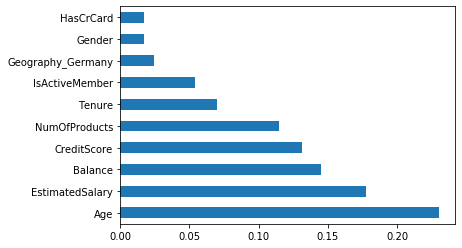

In [13]:
# Using the following method.feautre_importance we can see which feature play the most important role
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

Now that the algorithm has been trained, it’s time to see how well it performs. For evaluating the performance of a 
classification algorithm, the most commonly used metrics are the F1 measure, precision, recall, and accuracy.

In Python’s scikit-learn library, you can use built-in functions to find all of these values

In [14]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_dt_pred ))  
print(accuracy_score(y_test, y_dt_pred ))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1595
           1       0.52      0.60      0.56       405

    accuracy                           0.81      2000
   macro avg       0.71      0.73      0.72      2000
weighted avg       0.82      0.81      0.81      2000

0.8075


In [15]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_dt_pred)))

Accuracy on test data is 0.81


### Logistic Regression

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

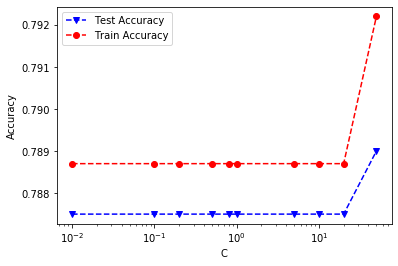

In [16]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    logreg = LogisticRegression(C=param)
    logreg.fit(X,y)
    log_reg_pred = logreg.predict(X_test)
    log_reg_pred_train = logreg.predict(X)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [17]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, log_reg_pred ))  
print(accuracy_score(y_test, log_reg_pred ))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.10       405

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.49      2000
weighted avg       0.71      0.79      0.72      2000

0.789


In [18]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, log_reg_pred)))

Accuracy on test data is 0.79


### Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,y)
NB_pred = clf_NB.predict(X_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

[0 0 0 ... 0 0 0]
Accuracy on test data is 0.79


In [20]:
print(classification_report(y_test, NB_pred ))  
print(accuracy_score(y_test, NB_pred ))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1595
           1       0.38      0.09      0.15       405

    accuracy                           0.79      2000
   macro avg       0.59      0.53      0.51      2000
weighted avg       0.72      0.79      0.73      2000

0.786


### Support Vector Machine Classifier

#### Linear Decision Boundary 

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

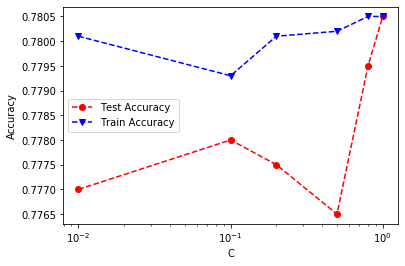

In [21]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X,y)
    svml_pred = clf.predict(X_test)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy') 


In [22]:
print(classification_report(y_test, svml_pred ))  
print(accuracy_score(y_test, svml_pred ))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.24      0.04      0.07       405

    accuracy                           0.78      2000
   macro avg       0.52      0.50      0.47      2000
weighted avg       0.69      0.78      0.71      2000

0.7805


In [23]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, svml_pred)))

Accuracy on test data is 0.78


#### Non Linear Decision Boundary 

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

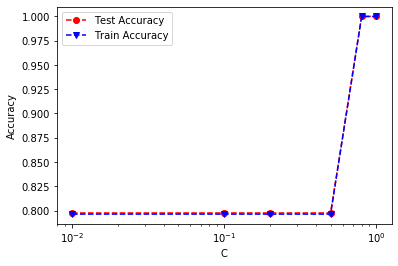

In [24]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1]
 

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,y)
    svml2_pred = clf.predict(X_test)
    svml2_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml2_pred))
    SVMLtrainAcc.append(accuracy_score(y,svml2_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [25]:
print(classification_report(y_test, svml2_pred ))  
print(accuracy_score(y_test, svml2_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

1.0


In [26]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, svml2_pred)))

Accuracy on test data is 1.00


### KNN K Nearest Neighbor Classifier

[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

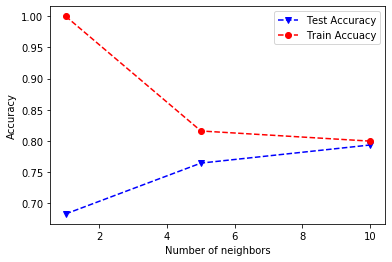

In [27]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    knn_pred = clf.predict(X_test)
    knn_pred_train = clf.predict(X_train)
    
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y_train,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [28]:
print(classification_report(y_test, knn_pred))  
print(accuracy_score(y_test, knn_pred ))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1595
           1       0.35      0.02      0.04       405

    accuracy                           0.79      2000
   macro avg       0.57      0.51      0.46      2000
weighted avg       0.71      0.79      0.71      2000

0.7935


In [29]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, knn_pred)))

Accuracy on test data is 0.79


### Artificual Neural Network 

In [30]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing


Using TensorFlow backend.


In [31]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [32]:
#Provided Dataset conversion from excel file to dataframe for classification modeling.
data = pd.read_csv('Churn_Modelling.csv',sep=',')
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [33]:
# Eliminating Unessary columns that will be less likely to effect or predictions. A few Categorical values that do not correlate 
# with our churn. The following columns RowNumber, CustomerID and Surname can be dropped from dataset.
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.shape

(10000, 11)

In [34]:
#Convert Gender values into 0 and 1 
labelencoder_gender = LabelEncoder()
data['Gender'] = labelencoder_gender.fit_transform(data['Gender'])

data.head(8)
#Convert the remaining categorical value Geogrpahy attribute to 0 and 1 in sepearte column
data= pd.get_dummies(df)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [35]:
Test_Data = data
Classes = encode_text_index(data,'Exited')

In [36]:
Classes

array([0, 1], dtype=int64)

In [37]:
Test_Data.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1


In [38]:
X,Y = to_xy(data,'Exited')

testX, testY = to_xy(Test_Data,'Exited')

In [39]:
print(X.shape)
print(Y.shape)
Y

(10000, 12)
(10000, 2)


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [40]:
model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,verbose=2, epochs=100)

Epoch 1/100
 - 1s - loss: 1034.2619
Epoch 2/100
 - 1s - loss: 52.1127
Epoch 3/100
 - 1s - loss: 36.1908
Epoch 4/100
 - 1s - loss: 30.8288
Epoch 5/100
 - 1s - loss: 33.0933
Epoch 6/100
 - 1s - loss: 35.8323
Epoch 7/100
 - 1s - loss: 32.3649
Epoch 8/100
 - 1s - loss: 21.1608
Epoch 9/100
 - 1s - loss: 21.2312
Epoch 10/100
 - 1s - loss: 28.9366
Epoch 11/100
 - 1s - loss: 23.4031
Epoch 12/100
 - 1s - loss: 24.0248
Epoch 13/100
 - 1s - loss: 19.8634
Epoch 14/100
 - 1s - loss: 19.4966
Epoch 15/100
 - 1s - loss: 17.9091
Epoch 16/100
 - 1s - loss: 19.1088
Epoch 17/100
 - 1s - loss: 20.2269
Epoch 18/100
 - 1s - loss: 21.4463
Epoch 19/100
 - 1s - loss: 16.1830
Epoch 20/100
 - 1s - loss: 15.9799
Epoch 21/100
 - 1s - loss: 17.9038
Epoch 22/100
 - 1s - loss: 18.4983
Epoch 23/100
 - 1s - loss: 19.8140
Epoch 24/100
 - 1s - loss: 18.4440
Epoch 25/100
 - 1s - loss: 14.3772
Epoch 26/100
 - 1s - loss: 16.5263
Epoch 27/100
 - 0s - loss: 23.3396
Epoch 28/100
 - 0s - loss: 16.7560
Epoch 29/100
 - 0s - loss: 

In [41]:
pred = model.predict(testX)
print(pred[0])

[0.86078554 0.13921444]


In [42]:
pred = np.argmax(pred, axis=1)

true = np.argmax(testY, axis=1)

In [43]:
Classes[pred]

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [44]:
Classes[true]

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [45]:
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.54


In [46]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       0.87      0.50      0.63      7963
           1       0.26      0.70      0.38      2037

    accuracy                           0.54     10000
   macro avg       0.56      0.60      0.51     10000
weighted avg       0.74      0.54      0.58     10000

